# Generative Adversarial Network

**Introduction to Deep Learning (BioE 394E)**  
This code is partially based on the [PyTorch DCGAN tutorial][https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html].

Generative Adversarial Networks, introduced in 2014, are neural nets we can train to produce new images (or other kinds of data) that look as though they came from our true data distribution. In this notebook, we'll implement a small GAN for generating images that look as though they come from the MNIST dataset.

The key insight behind the GAN is to pit two neural networks against each other. On the one hand is the Generator, a neural network that takes random noise as input and produces an image as output. On the other hand is the Discriminator (or Critic), which takes in an image and classifies it as real (from MNIST) or fake (from our Generator). During training, we alternate between training the Generator to fool the Discriminator, and training the Discriminator to call the Generator's bluff.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm
import torch.nn as nn
import torchvision.utils as vutils

In [2]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)
torch.random.manual_seed(42)

In [3]:
# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook. It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Loading the data
As in previous examples, we'll use MNIST, because it's a small and easy-to-use dataset.

In [4]:
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

Remind ourselves what an image looks like since we're going to generate them.

Default image shape: Dataset MNIST
    Number of datapoints: 60000
    Root location: ./datasets
    Split: Train
    StandardTransform
Transform: ToTensor()
Reshaped image shape: Dataset MNIST
    Number of datapoints: 10000
    Root location: ./datasets
    Split: Test
    StandardTransform
Transform: ToTensor()
The label for this image: 4


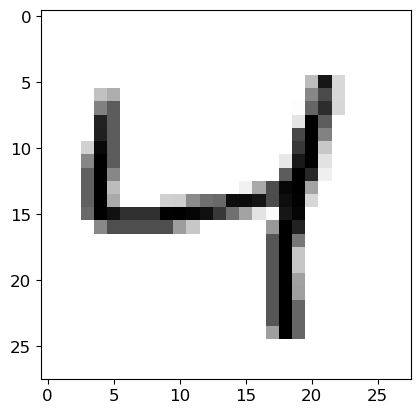

In [5]:
# Pick out the 2nd (0-indexed) example from the training set
image, label = mnist_train[2]

# Plot the image
print("Default image shape: {}".format(mnist_train))
image = image.reshape([28,28])
print("Reshaped image shape: {}".format(mnist_test))
plt.imshow(image, cmap="gray_r")

# Print the label
print("The label for this image: {}".format(label))

In [6]:
batchsize=64
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [7]:
data_train_iter = iter(train_loader)
images, labels = next(data_train_iter)

print("Shape of the minibatch of images: {}".format(images.shape))
print("Shape of the minibatch of labels: {}".format(labels.shape))

Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])


## GAN Network Definition

In [8]:
device='cpu' # change if you have a gpu

nz=10 # Number of latent variables
nout=784 # Number of output variables (784 for MNIST, 28x28)

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        hidden_size=500
        self.main = nn.Sequential(
            nn.Linear(nz,hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size,hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size,nout)
        )

    def forward(self, z):
        return self.main(z)

In [10]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        hidden_size=500
        self.main = nn.Sequential(
            nn.Linear(nout,hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size,hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size,1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.main(x)

In [11]:
# Create the generator
gen = Generator()

# Print the model
print(gen)

# Create the critic
critic = Discriminator()

# Print the model
print(critic)


Generator(
  (main): Sequential(
    (0): Linear(in_features=10, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=784, bias=True)
  )
)
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


## Set up optimization

In [12]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Setup Adam optimizers for both G and D
lr=1e-3
beta1 = 0.5
opt_critic = torch.optim.Adam(critic.parameters(), lr=lr, betas=(beta1, 0.999))
opt_gen = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta1, 0.999))

## Training

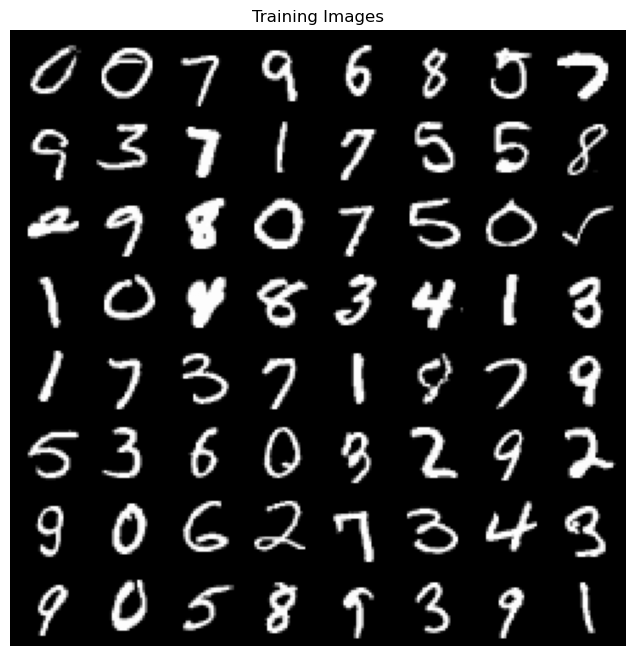

In [13]:
# Plot some real images
real_batch = next(iter(data_train_iter))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [14]:
# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = 2*torch.rand(8, nz, device=device)

Starting Training Loop...
Average guess on a real, fake image is 0.5041080713272095, 0.5000569820404053.


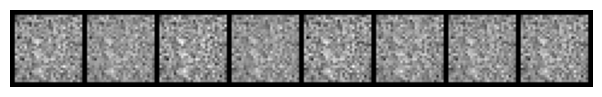

Average guess on a real, fake image is 0.7993630766868591, 0.16062067449092865.


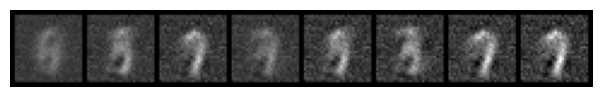

Average guess on a real, fake image is 0.7760452032089233, 0.31318801641464233.


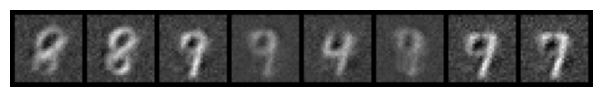

Average guess on a real, fake image is 0.6484062671661377, 0.2106831967830658.


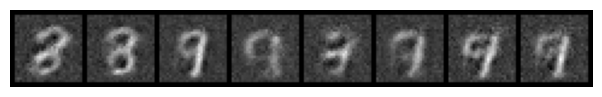

Average guess on a real, fake image is 0.8099904656410217, 0.24232269823551178.


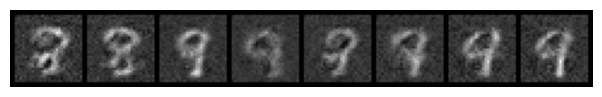

Average guess on a real, fake image is 0.7795189619064331, 0.15911559760570526.


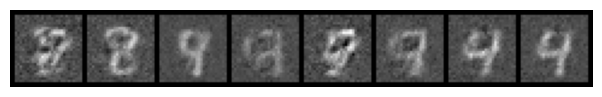

Average guess on a real, fake image is 0.7855647206306458, 0.1650366336107254.


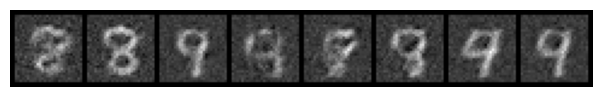

Average guess on a real, fake image is 0.8113438487052917, 0.1335122287273407.


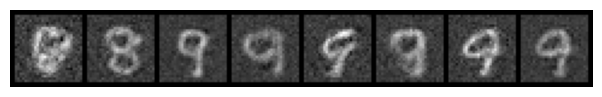

Average guess on a real, fake image is 0.897091269493103, 0.16662177443504333.


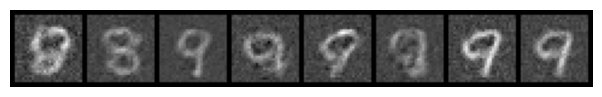

Average guess on a real, fake image is 0.8605422973632812, 0.11913599073886871.


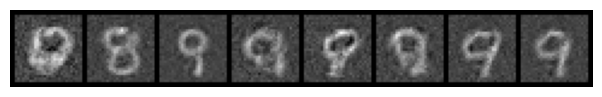

Average guess on a real, fake image is 0.8555839657783508, 0.18668949604034424.


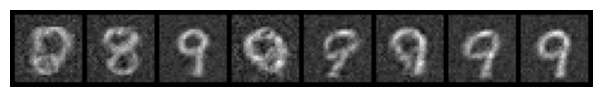

Average guess on a real, fake image is 0.8859677910804749, 0.12804527580738068.


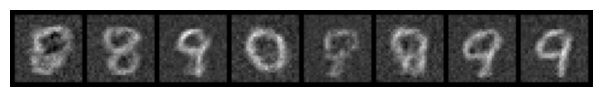

Average guess on a real, fake image is 0.9215423464775085, 0.08182192593812943.


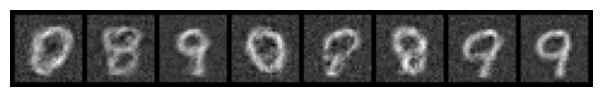

Average guess on a real, fake image is 0.8957270979881287, 0.12679655849933624.


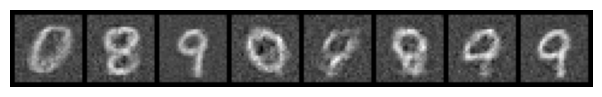

Average guess on a real, fake image is 0.8577892780303955, 0.08579999208450317.


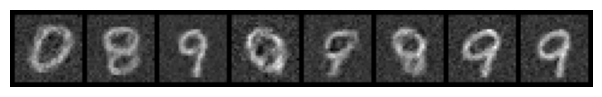

Average guess on a real, fake image is 0.8600949048995972, 0.0888427197933197.


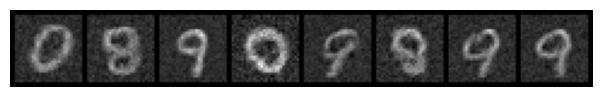

Average guess on a real, fake image is 0.868203341960907, 0.07849577069282532.


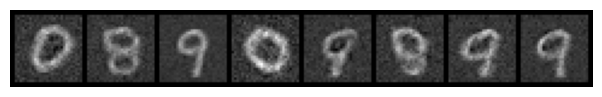

Average guess on a real, fake image is 0.9502482414245605, 0.1707184612751007.


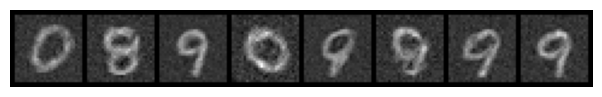

Average guess on a real, fake image is 0.9236817359924316, 0.10585495829582214.


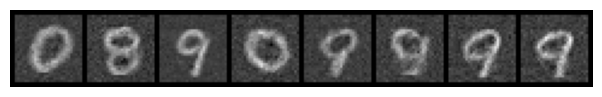

Average guess on a real, fake image is 0.9407713413238525, 0.10480955243110657.


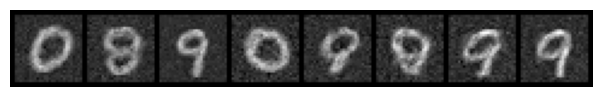

Average guess on a real, fake image is 0.8214240074157715, 0.057955775409936905.


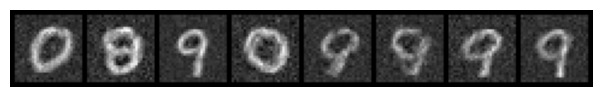

Average guess on a real, fake image is 0.9582347273826599, 0.13590329885482788.


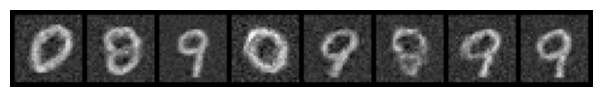

Average guess on a real, fake image is 0.9526857137680054, 0.10092489421367645.


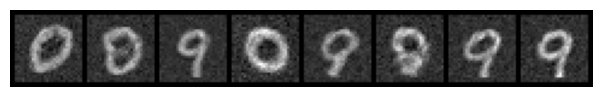

Average guess on a real, fake image is 0.9031351208686829, 0.08354071527719498.


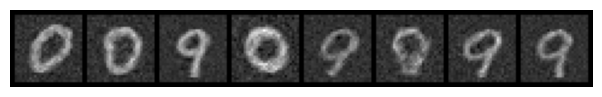

Average guess on a real, fake image is 0.9381820559501648, 0.07268062233924866.


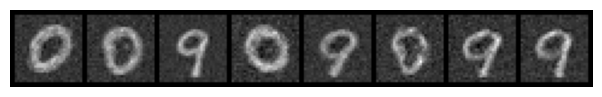

Average guess on a real, fake image is 0.9200924634933472, 0.10498267412185669.


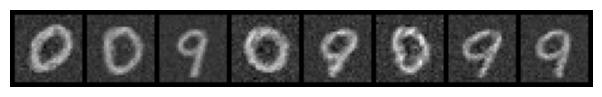

Average guess on a real, fake image is 0.892956554889679, 0.07394929975271225.


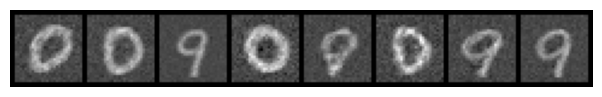

Average guess on a real, fake image is 0.9236347675323486, 0.08161535859107971.


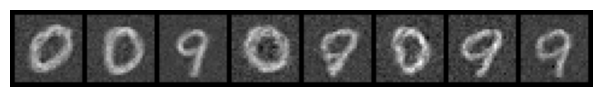

Average guess on a real, fake image is 0.9326777458190918, 0.08210458606481552.


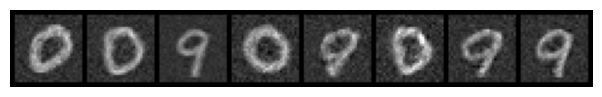

Average guess on a real, fake image is 0.9346199631690979, 0.08659004420042038.


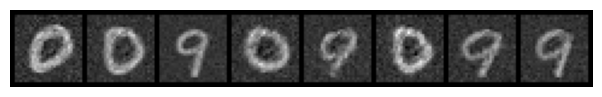

Average guess on a real, fake image is 0.927137553691864, 0.05909566581249237.


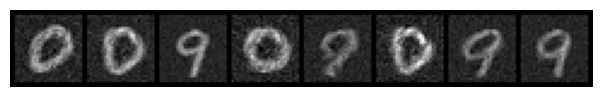

Average guess on a real, fake image is 0.924399197101593, 0.0658896341919899.


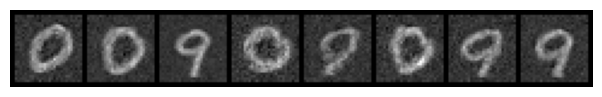

Average guess on a real, fake image is 0.9436500668525696, 0.07106588035821915.


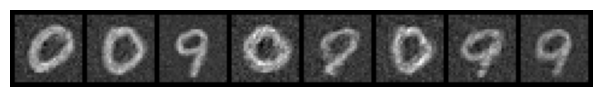

Average guess on a real, fake image is 0.9385525584220886, 0.05441681295633316.


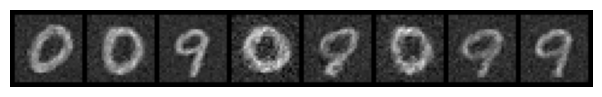

Average guess on a real, fake image is 0.9448595643043518, 0.05498287081718445.


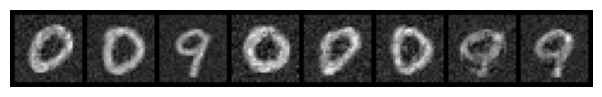

Average guess on a real, fake image is 0.9418354034423828, 0.04733644053339958.


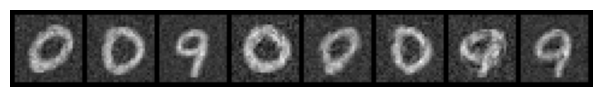

Average guess on a real, fake image is 0.9275264739990234, 0.09020897001028061.


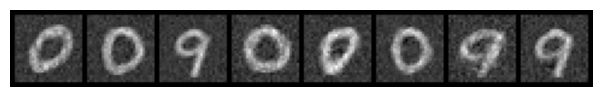

In [15]:
saved_images = []
gen_losses = []
critic_losses = []
img_list=[]
iters = 0
real_label_value=1
fake_label_value=0
num_epochs=30
print("Starting Training Loop...")
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader, 0):
        ###########
        # Update the critic
        ###########
        critic.zero_grad()

        # First, calculate losses and gradients with respect to real data
        real_images = data[0]
        current_batch_size=real_images.size()[0]
        real_label = torch.full((current_batch_size,), real_label_value, dtype=torch.float, device=device)
        # Forward pass real batch through D
        real_guesses = critic(real_images.flatten(1)).view(-1)
        # Calculate loss on all-real batch
        loss_critic_real = criterion(real_guesses, real_label)
        # Calculate gradients for D in backward pass
        loss_critic_real.backward()
        D_real = real_guesses.mean().item()

        # Second, calculate losses and gradients with respect to fake data
        # Generate batch of latent vectors
        noise = torch.randn(current_batch_size, nz, device=device)
        # Generate fake image batch with G
        fake_images = gen(noise)
        fake_label = torch.full((current_batch_size,), fake_label_value, dtype=torch.float, device=device)
        # Classify all fake batch with D
        fake_guesses = critic(fake_images.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        loss_critic_fake = criterion(fake_guesses, fake_label)
        # Calculate the gradients for this batch
        loss_critic_fake.backward()
        D_fake_1 = fake_guesses.mean().item()

        ## Store losses for posterity
        critic_losses.append((loss_critic_real+loss_critic_fake).item())

        # Update D
        opt_critic.step()

        #########
        # Update generator
        #########
        gen.zero_grad()
        fake_guesses = critic(fake_images).view(-1)
        # Calculate gen's loss based on this output
        loss_critic_fake = criterion(fake_guesses, real_label)
        # Calculate gradients for gen
        loss_critic_fake.backward()
        D_fake_2 = fake_guesses.mean().item()
        ## Store losses for posterity
        gen_losses.append((loss_critic_fake).item())

        # Update G
        opt_gen.step()

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(train_loader)-1)):
            print('Average guess on a real, fake image is {}, {}.'.format(D_real,D_fake_1))
            with torch.no_grad():
                fake_images_to_visualize = gen(fixed_noise).detach().cpu().reshape(-1,1,28,28)
            img_list.append(vutils.make_grid(fake_images_to_visualize, padding=2, normalize=True))
            fig = plt.figure(figsize=(8,1))
            plt.axis("off")
            plt.imshow(np.transpose(img_list[-1],(1,2,0)))
            plt.show()

        iters += 1

## Let's visualize the training

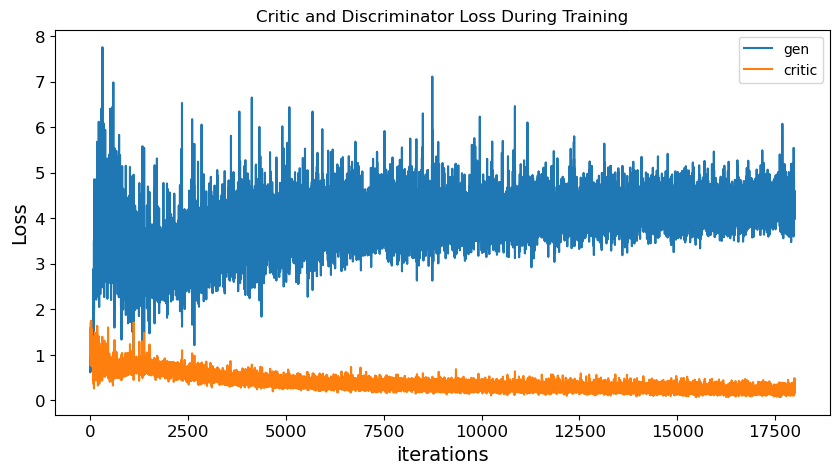

In [16]:
plt.figure(figsize=(10,5))
plt.title("Critic and Discriminator Loss During Training")
plt.plot(gen_losses,label="gen")
plt.plot(critic_losses,label="critic")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

/var/folders/hz/whyy4hf94zb_hv9znf2_tn500000gp/T/ipykernel_61226/514266514.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8,1))


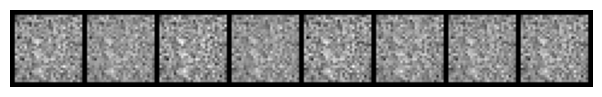

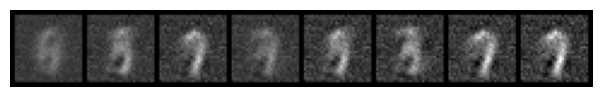

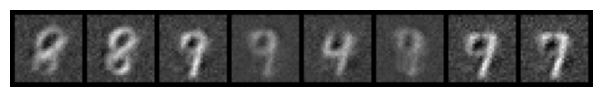

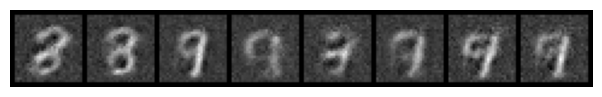

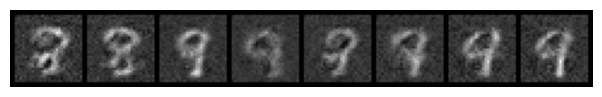

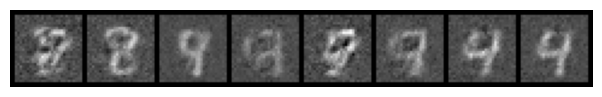

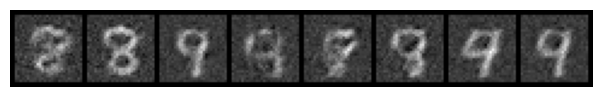

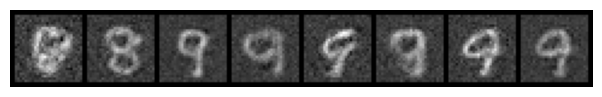

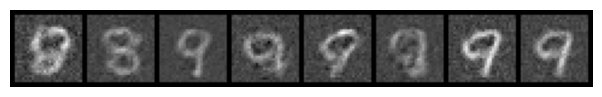

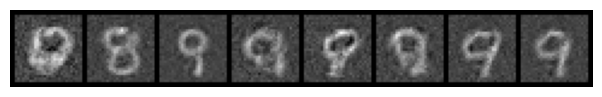

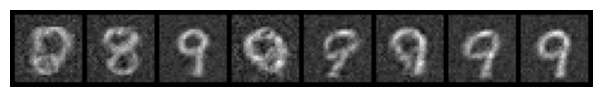

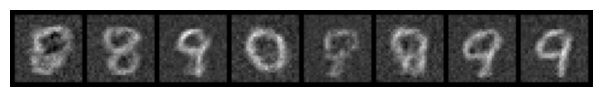

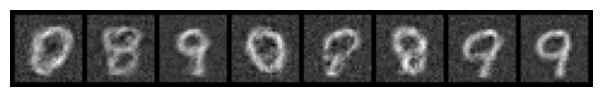

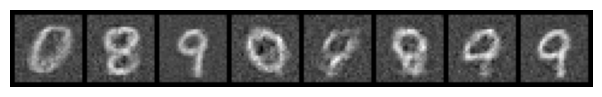

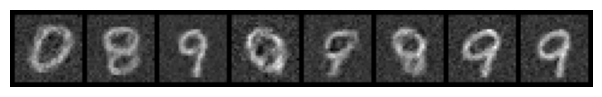

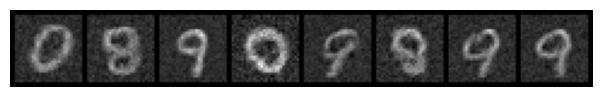

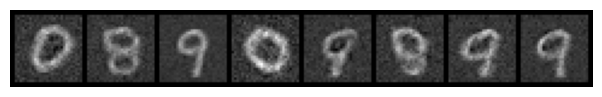

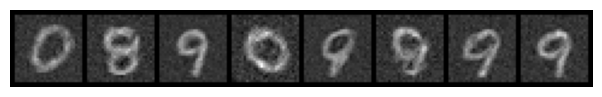

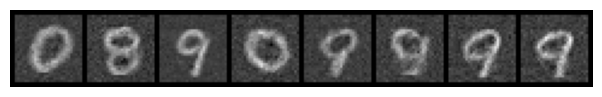

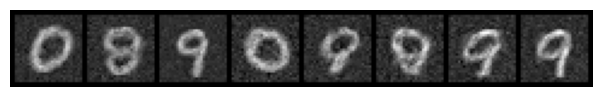

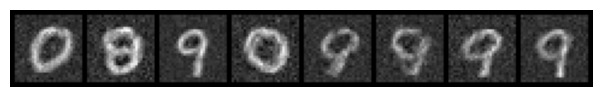

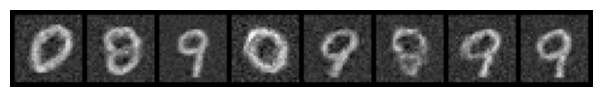

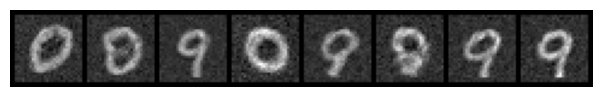

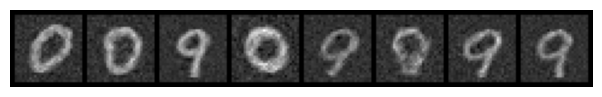

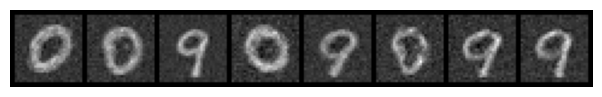

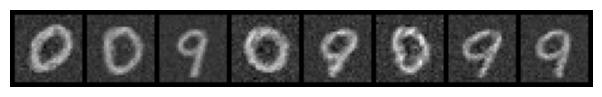

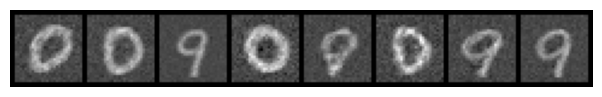

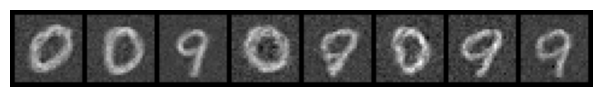

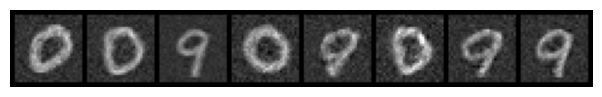

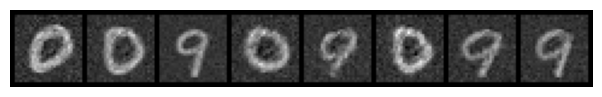

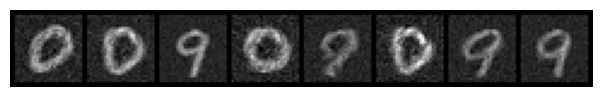

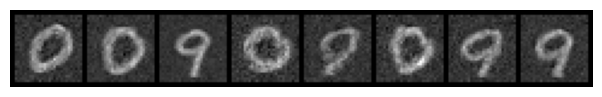

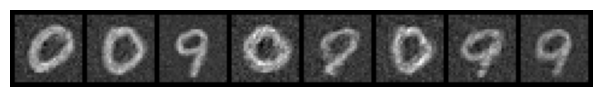

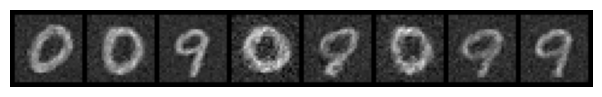

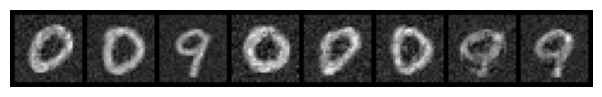

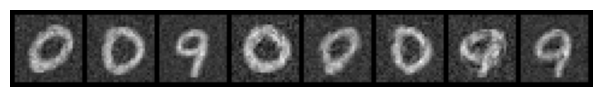

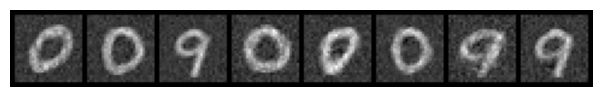

In [17]:
## Visualization of evolving generation
for i in img_list:
    fig = plt.figure(figsize=(8,1))
    plt.axis("off")
    plt.imshow(np.transpose(i,(1,2,0)))